In [24]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.path.dirname("."), '..'))
sys.path.insert(0, parent_dir)
from bsmodel import BSModel
import numpy as np
import matplotlib.pyplot as plt
import bridgestan as bs
from scipy.stats import norm
from ipywidgets import interact, FloatSlider
import matplotlib as mpl

In [2]:
homedir = "/mnt/c/Users/jccer/" # "/Users/edward/"
bs.set_bridgestan_path(homedir + "bridgestan")

In [3]:
bs_model = BSModel(stan_file = homedir + "mcmcexperiments/stan/normal.stan",
                   data_file = homedir + "mcmcexperiments/stan/normal.json")

In [4]:
N = 201
limit = 7
x = np.linspace(-limit, limit, N)
y = np.linspace(-limit, limit, N)

In [5]:
z = np.zeros(2)
Z = np.zeros((N, N))
for ix, xn in enumerate(x):
    for iy, yn in enumerate(y):
        z[0] = xn
        z[1] = yn
        Z[ix, iy] = bs_model.log_density(z)

In [ ]:
def random_point(rng):
    m = np.zeros(2)
    S = np.eye(2)
    return rng.multivariate_normal(m, S)

def random_direction(rng):
    x = random_point(rng)
    return x / np.linalg.norm(x)

def to_line(rho, x, o):
    return x.reshape(-1) * rho + o

In [11]:
rng = np.random.default_rng()

In [82]:
p = random_point(rng)
cols = list(mpl.colors.BASE_COLORS.keys())
rho = random_direction(rng)
def rotation_matrix(theta):
    s = np.sin(theta)
    c = np.cos(theta)
    return np.array([[c, -s], [s, c]])
r = rotation_matrix(30)

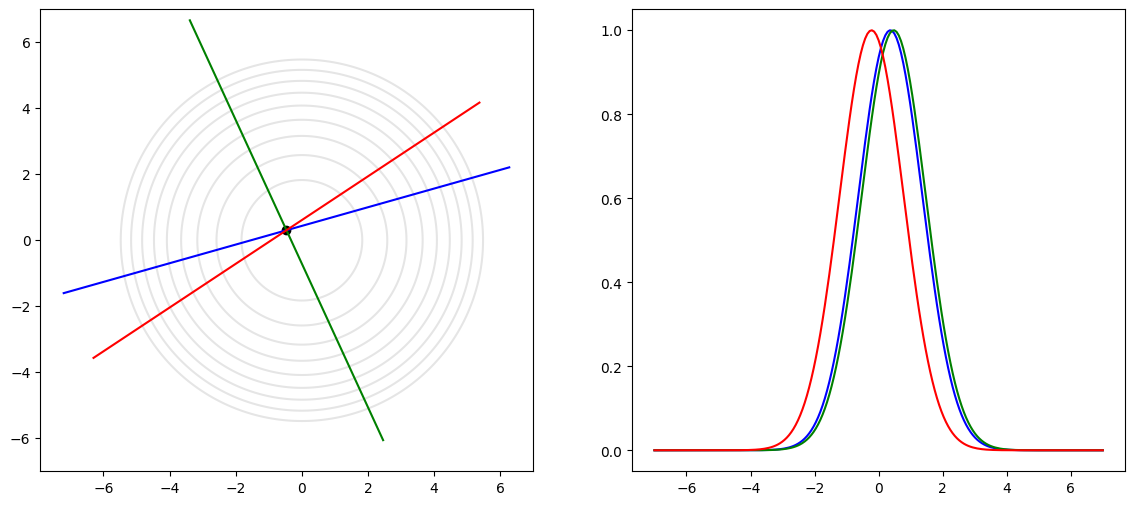

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (14, 6))
axs[0].contour(x, y, Z, levels = np.linspace(-15, 0, 10),
           colors = "black", linestyles = "solid", alpha = 0.1)
axs[0].scatter(p[0], p[1], color = "black")
for idx in range(3): 
    line = np.array([to_line(rho, x[n], p) for n in range(N)])
    fx = np.array([np.exp(bs_model.log_density(line[n])) for n in range(N)])
    mfx = np.max(fx)
    fx = fx / mfx
    axs[0].plot(line[:, 0], line[:, 1], color = cols[idx])
    axs[1].plot(x, fx, color = cols[idx])
    rho = r @ rho